**Step-1**

**Import required packages**

- Package-1: Related to blob

  - pip install azure-storage-blob azure-identity

- Package-2: Related to Azure Document Intelligence serivce

  - pip install azure-ai-formrecognizer


**Step-2**

- Create Azure Document Intelligence service

- Go to azure portal 

- Search for Azure AI services

- Under that we have Document intelligence service

- Create your services

- Once you created , Go to service main page

- We need **keys and endpoint**

In [3]:
key="7db40b44b94c47baa8c06bf73ada50fa"
end_point="https://nareshitdocumentintelligene.cognitiveservices.azure.com/"

In [4]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(end_point, credential)

**Step-3**

- Imagine the file is uploaded already in storage services

- Connect to the Container

- See your blob(or file avialable)

- Connect to blob and read the image

- Get blob url

In [23]:
from azure.storage.blob import BlobServiceClient
blob_account_url='https://azureaisession.blob.core.windows.net/'
storage_credential="Zh+OkfuFkg5jybcJxiEUINJsZa3RLCwL/HL/jcSn3gnK0+zO1krjHVjAmJWWvCGhbIO089F9XHx4+ASt6lSrWQ=="

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client

In [24]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'nareshitomkarcontainer', 'last_modified': datetime.datetime(2024, 8, 31, 7, 31, 16, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC98EE63D9F22"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x00000292D3251750>, 'immutable_storage_with_versioning_enabled': False}]

In [26]:
container_client = blob_service_client.get_container_client('nareshitomkarcontainer')
for blob in container_client.list_blobs():
    print(blob.name)

Visadataset.csv
download.png
invoice-sample.jpg
mbox-short.txt


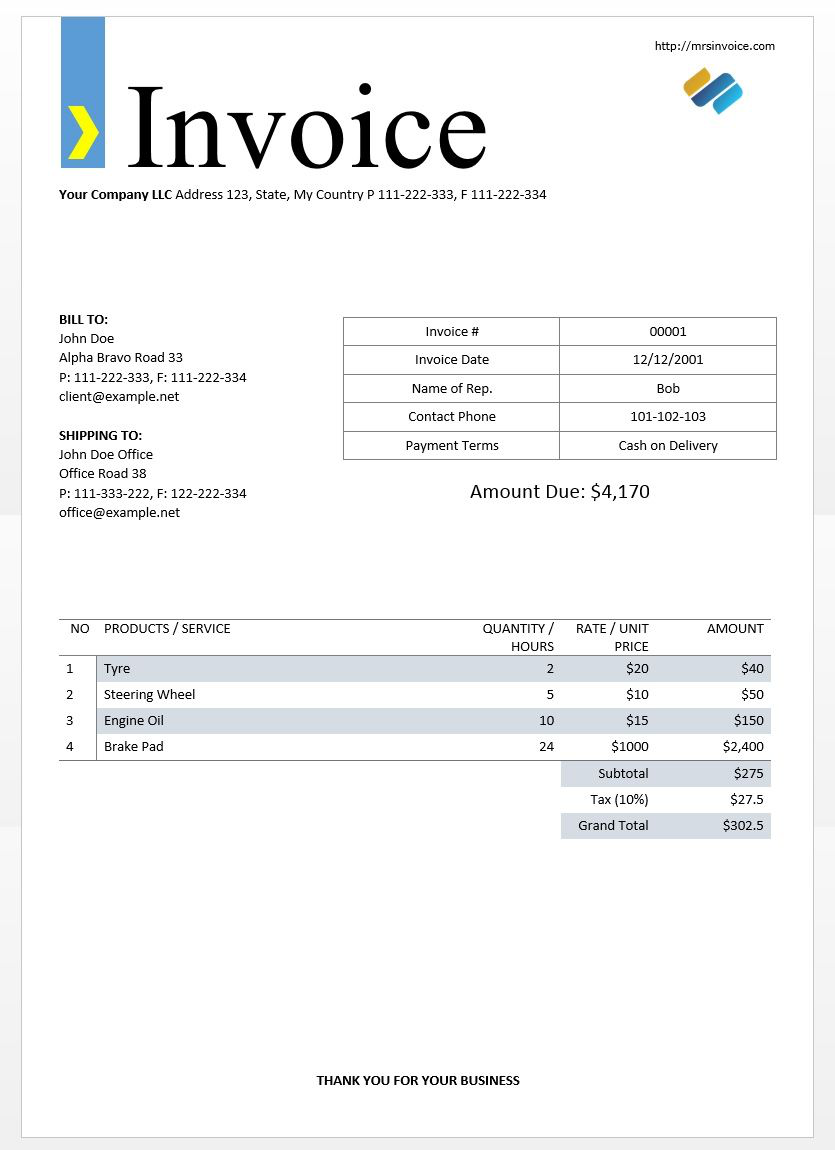

In [28]:
blob_client=blob_service_client.get_blob_client('nareshitomkarcontainer','invoice-sample.jpg')
data=blob_client.download_blob()
from PIL import Image
image=Image.open(data)
image

**Step-3**

**Using blob url**

In [88]:
# Initialize Blob Client
from azure.storage.blob import BlobClient
blob_account_url='https://azureaisession.blob.core.windows.net/'
storage_credential="Zh+OkfuFkg5jybcJxiEUINJsZa3RLCwL/HL/jcSn3gnK0+zO1krjHVjAmJWWvCGhbIO089F9XHx4+ASt6lSrWQ=="
blob_url='https://azureaisession.blob.core.windows.net/nareshitomkarcontainer/invoice-sample.jpg'

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# Download the image invoice from Azure Storage
with open("invoice_image.jpg", "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

    # Print out the extracted data
    for idx, invoice in enumerate(result.documents):
        print(f"============Recognise Invoice: {idx + 1}===================")
        #for name, field in invoice.fields.items():
            #print(f"{name}: {field.value}")
        for i in invoice.fields:
            print(i)
            print(f"{i}:{invoice.fields[i].value}")
 


============Recognise Invoice: 1===================
AmountDue
AmountDue:$4170.0
BillingAddress
BillingAddress:AddressValue(house_number=None, po_box=None, road=Alpha Bravo Road 33, city=None, state=None, postal_code=None, country_region=None, street_address=Alpha Bravo Road 33, unit=None, city_district=None, state_district=None, suburb=None, house=None, level=None)
BillingAddressRecipient
BillingAddressRecipient:John Doe
CustomerName
CustomerName:John Doe
InvoiceDate
InvoiceDate:2001-12-12
InvoiceId
InvoiceId:00001
InvoiceTotal
InvoiceTotal:$302.5
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=40.0, symbol=$, code=USD), content=$40, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=740.0, y=660.0), Point(x=763.0, y=660.0), Point(x=764.0, y=674.0), Point(x=741.0, y=675.0)])], spans=[DocumentSpan(offset=499, length=3)], confidence=0.922), 'Description': DocumentField(value_type=string, value=

In [70]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            value=invoice.fields[i].value[0].value['Amount'].value
            item=invoice.fields[i].value[0].value['Description'].value
            print(f"{item} has {value}")

============Recognise Invoice: 1===================
Tyre has $40.0


In [76]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            print(len(invoice.fields[i].value))
            

============Recognise Invoice: 1===================
4


In [87]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[element].value['Amount'].value
                item=invoice.fields[i].value[element].value['Description'].value
                print(f"{item} has {value}")
        if i!='Items':
             print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
AmountDue:$4170.0
BillingAddress:AddressValue(house_number=None, po_box=None, road=Alpha Bravo Road 33, city=None, state=None, postal_code=None, country_region=None, street_address=Alpha Bravo Road 33, unit=None, city_district=None, state_district=None, suburb=None, house=None, level=None)
BillingAddressRecipient:John Doe
CustomerName:John Doe
InvoiceDate:2001-12-12
InvoiceId:00001
InvoiceTotal:$302.5
Tyre has $40.0
Steering Wheel has $50.0
Engine Oil has $150.0
Brake Pad has $2400.0
PaymentTerm:Cash on Delivery
ShippingAddress:AddressValue(house_number=None, po_box=None, road=Office Road 38, city=None, state=None, postal_code=None, country_region=None, street_address=Office Road 38, unit=None, city_district=None, state_district=None, suburb=None, house=None, level=None)
ShippingAddressRecipient:John Doe Office
SubTotal:$275.0
TotalTax:$27.5
VendorAddress:AddressValue(house_number=None, po_box=None, road=None, city=None, state=None, p